In [6]:
import pandas as pd
df = pd.read_csv("../3_Analysis_on_Extracted_Data/tracking_features_with_labels.csv")
df.head()

,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,total_distance,straightness,mean_heading_change,duration,length,cluster,pca1,pca2,predicted_label
0,7,1893,1.657872e+08,0.000011,62.014453,117331.344816,0.118644,0.507563,299460000000,118.952195,0,1.217997,1.156326,RURAL
1,8,1752,3.410895e+07,0.000051,41.602138,72845.343283,0.070770,0.646714,346740000000,75.038270,2,0.264000,-1.839574,URBAN
2,11,1224,4.864727e+08,0.000003,69.604793,85126.662327,0.360045,0.563577,208300000000,86.281243,1,-2.774247,4.094970,SUBURBAN
3,12,2091,1.591802e+08,0.000013,66.382378,138739.169630,0.010805,0.558058,355540000000,140.722367,0,3.502377,0.238572,RURAL
4,15,1587,7.233978e+08,0.000002,80.415227,127538.550565,0.204191,0.539375,340810000000,128.919145,0,1.913714,3.517660,RURAL


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
features = df.drop(columns=["tracking_id", "cluster", "predicted_label", "pca1", "pca2"])
labels = df["predicted_label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       RURAL       0.97      0.98      0.98      2270
    SUBURBAN       0.97      0.96      0.96      1073
        TOWN       0.97      0.96      0.97      3586
       URBAN       0.96      0.96      0.96      1900

    accuracy                           0.97      8829
   macro avg       0.97      0.97      0.97      8829
weighted avg       0.97      0.97      0.97      8829

Confusion Matrix:
[[2232    7   18   13]
 [   7 1029   36    1]
 [  39   25 3456   66]
 [  19    3   57 1821]]


In [8]:
import joblib
joblib.dump(clf, "rf_area_classifier_full.pkl")


['rf_area_classifier_full.pkl']

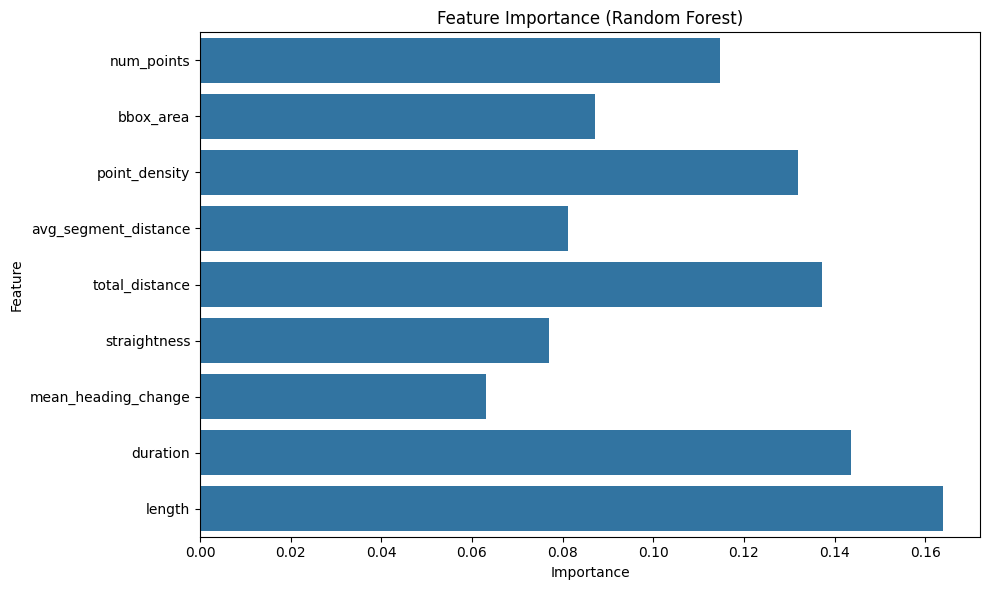

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

clf = joblib.load("rf_area_classifier_full.pkl")

importances = clf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, features, labels, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))
